# Data Profiling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data_telco.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,NaN,NaN,NaN,NaN,1,No,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,NaN,NaN,NaN,NaN,34,Yes,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,NaN,NaN,NaN,NaN,2,Yes,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,NaN,NaN,NaN,NaN,45,No,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,NaN,NaN,NaN,NaN,2,Yes,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            6034 non-null   object 
 2   SeniorCitizen     6034 non-null   float64
 3   Partner           6034 non-null   object 
 4   Dependents        6034 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     6034 non-null   object 
 8   InternetService   6034 non-null   object 
 9   OnlineSecurity    6034 non-null   object 
 10  OnlineBackup      6034 non-null   object 
 11  DeviceProtection  6034 non-null   object 
 12  TechSupport       6034 non-null   object 
 13  StreamingTV       6034 non-null   object 
 14  StreamingMovies   6034 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.isna().sum()

customerID             0
gender              1009
SeniorCitizen       1009
Partner             1009
Dependents          1009
tenure                 0
PhoneService           0
MultipleLines       1009
InternetService     1009
OnlineSecurity      1009
OnlineBackup        1009
DeviceProtection    1009
TechSupport         1009
StreamingTV         1009
StreamingMovies     1009
Contract               0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
Churn                  0
dtype: int64

# Data Cleansing

In [6]:
# handling missing value

In [7]:
df['InternetService'] = df.InternetService.fillna("unknown")

In [8]:
df['InternetService'].value_counts()

Fiber optic    2621
DSL            2092
No             1321
unknown        1009
Name: InternetService, dtype: int64

In [9]:
# change data type

In [10]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors="coerce")

In [11]:
df.isna().sum()

customerID             0
gender              1009
SeniorCitizen       1009
Partner             1009
Dependents          1009
tenure                 0
PhoneService           0
MultipleLines       1009
InternetService        0
OnlineSecurity      1009
OnlineBackup        1009
DeviceProtection    1009
TechSupport         1009
StreamingTV         1009
StreamingMovies     1009
Contract               0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges          11
Churn                  0
dtype: int64

In [12]:
val = df['TotalCharges'].median()
df['TotalCharges'] = df['TotalCharges'].fillna(val)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            6034 non-null   object 
 2   SeniorCitizen     6034 non-null   float64
 3   Partner           6034 non-null   object 
 4   Dependents        6034 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     6034 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    6034 non-null   object 
 10  OnlineBackup      6034 non-null   object 
 11  DeviceProtection  6034 non-null   object 
 12  TechSupport       6034 non-null   object 
 13  StreamingTV       6034 non-null   object 
 14  StreamingMovies   6034 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Exploratory Data Analysis

In [14]:
# Describe

In [15]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,6034.000000,7043.000000,7043.000000,7043.000000
mean,0.161916,32.371149,64.761692,2281.916928
std,0.368404,24.559481,30.090047,2265.270398
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [16]:
df['InternetService'].value_counts()

Fiber optic    2621
DSL            2092
No             1321
unknown        1009
Name: InternetService, dtype: int64

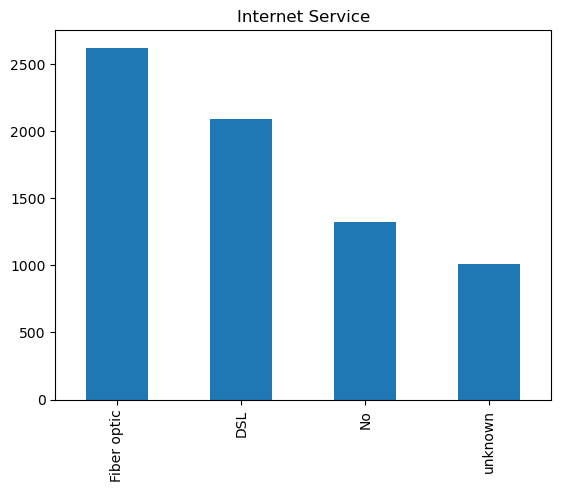

In [17]:
df['InternetService'].value_counts().plot(kind='bar');
plt.title('Internet Service');

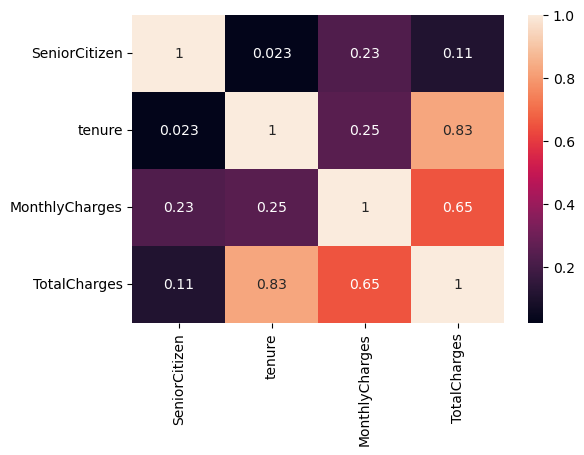

In [18]:
plt.figure(figsize = (6,4))
sns.heatmap(df.corr(), annot=True);

# Feature Enginerring

In [19]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,NaN,NaN,NaN,NaN,1,No,NaN,unknown,NaN,...,NaN,NaN,NaN,NaN,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,NaN,NaN,NaN,NaN,34,Yes,NaN,unknown,NaN,...,NaN,NaN,NaN,NaN,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,NaN,NaN,NaN,NaN,2,Yes,NaN,unknown,NaN,...,NaN,NaN,NaN,NaN,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,NaN,NaN,NaN,NaN,45,No,NaN,unknown,NaN,...,NaN,NaN,NaN,NaN,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,NaN,NaN,NaN,NaN,2,Yes,NaN,unknown,NaN,...,NaN,NaN,NaN,NaN,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [20]:
ps_enc = pd.get_dummies(df['PhoneService'], prefix="PhoneService", drop_first = False)
ps_enc

,PhoneService_No,PhoneService_Yes
0,1,0
1,0,1
2,0,1
3,1,0
4,0,1
...,...,...
7038,0,1
7039,0,1
7040,1,0
7041,0,1


In [21]:
df = df.drop(['PhoneService'], axis = 1)
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,NaN,NaN,NaN,NaN,1,NaN,unknown,NaN,NaN,NaN,NaN,NaN,NaN,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,NaN,NaN,NaN,NaN,34,NaN,unknown,NaN,NaN,NaN,NaN,NaN,NaN,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,NaN,NaN,NaN,NaN,2,NaN,unknown,NaN,NaN,NaN,NaN,NaN,NaN,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,NaN,NaN,NaN,NaN,45,NaN,unknown,NaN,NaN,NaN,NaN,NaN,NaN,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,NaN,NaN,NaN,NaN,2,NaN,unknown,NaN,NaN,NaN,NaN,NaN,NaN,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0.0,Yes,Yes,24,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0.0,Yes,Yes,72,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0.0,Yes,Yes,11,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1.0,Yes,No,4,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [22]:
df = pd.concat([df, ps_enc], axis=1)
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,PhoneService_No,PhoneService_Yes
0,7590-VHVEG,NaN,NaN,NaN,NaN,1,NaN,unknown,NaN,NaN,...,NaN,NaN,Month-to-month,Yes,Electronic check,29.85,29.85,No,1,0
1,5575-GNVDE,NaN,NaN,NaN,NaN,34,NaN,unknown,NaN,NaN,...,NaN,NaN,One year,No,Mailed check,56.95,1889.50,No,0,1
2,3668-QPYBK,NaN,NaN,NaN,NaN,2,NaN,unknown,NaN,NaN,...,NaN,NaN,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0,1
3,7795-CFOCW,NaN,NaN,NaN,NaN,45,NaN,unknown,NaN,NaN,...,NaN,NaN,One year,No,Bank transfer (automatic),42.30,1840.75,No,1,0
4,9237-HQITU,NaN,NaN,NaN,NaN,2,NaN,unknown,NaN,NaN,...,NaN,NaN,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0.0,Yes,Yes,24,Yes,DSL,Yes,No,...,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,0,1
7039,2234-XADUH,Female,0.0,Yes,Yes,72,Yes,Fiber optic,No,Yes,...,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,0,1
7040,4801-JZAZL,Female,0.0,Yes,Yes,11,No phone service,DSL,Yes,No,...,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,1,0
7041,8361-LTMKD,Male,1.0,Yes,No,4,Yes,Fiber optic,No,No,...,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,0,1


In [23]:
pb_enc = pd.get_dummies(df['PaperlessBilling'], prefix="Paperless_Billing", drop_first = False)
pb_enc

,Paperless_Billing_No,Paperless_Billing_Yes
0,0,1
1,1,0
2,0,1
3,1,0
4,0,1
...,...,...
7038,0,1
7039,0,1
7040,0,1
7041,0,1


In [24]:
df = df.drop(['PaperlessBilling'], axis = 1)
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,PhoneService_No,PhoneService_Yes
0,7590-VHVEG,NaN,NaN,NaN,NaN,1,NaN,unknown,NaN,NaN,...,NaN,NaN,NaN,Month-to-month,Electronic check,29.85,29.85,No,1,0
1,5575-GNVDE,NaN,NaN,NaN,NaN,34,NaN,unknown,NaN,NaN,...,NaN,NaN,NaN,One year,Mailed check,56.95,1889.50,No,0,1
2,3668-QPYBK,NaN,NaN,NaN,NaN,2,NaN,unknown,NaN,NaN,...,NaN,NaN,NaN,Month-to-month,Mailed check,53.85,108.15,Yes,0,1
3,7795-CFOCW,NaN,NaN,NaN,NaN,45,NaN,unknown,NaN,NaN,...,NaN,NaN,NaN,One year,Bank transfer (automatic),42.30,1840.75,No,1,0
4,9237-HQITU,NaN,NaN,NaN,NaN,2,NaN,unknown,NaN,NaN,...,NaN,NaN,NaN,Month-to-month,Electronic check,70.70,151.65,Yes,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0.0,Yes,Yes,24,Yes,DSL,Yes,No,...,Yes,Yes,Yes,One year,Mailed check,84.80,1990.50,No,0,1
7039,2234-XADUH,Female,0.0,Yes,Yes,72,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,One year,Credit card (automatic),103.20,7362.90,No,0,1
7040,4801-JZAZL,Female,0.0,Yes,Yes,11,No phone service,DSL,Yes,No,...,No,No,No,Month-to-month,Electronic check,29.60,346.45,No,1,0
7041,8361-LTMKD,Male,1.0,Yes,No,4,Yes,Fiber optic,No,No,...,No,No,No,Month-to-month,Mailed check,74.40,306.60,Yes,0,1


In [25]:
df = pd.concat([df, pb_enc], axis=1)
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,PhoneService_No,PhoneService_Yes,Paperless_Billing_No,Paperless_Billing_Yes
0,7590-VHVEG,NaN,NaN,NaN,NaN,1,NaN,unknown,NaN,NaN,...,NaN,Month-to-month,Electronic check,29.85,29.85,No,1,0,0,1
1,5575-GNVDE,NaN,NaN,NaN,NaN,34,NaN,unknown,NaN,NaN,...,NaN,One year,Mailed check,56.95,1889.50,No,0,1,1,0
2,3668-QPYBK,NaN,NaN,NaN,NaN,2,NaN,unknown,NaN,NaN,...,NaN,Month-to-month,Mailed check,53.85,108.15,Yes,0,1,0,1
3,7795-CFOCW,NaN,NaN,NaN,NaN,45,NaN,unknown,NaN,NaN,...,NaN,One year,Bank transfer (automatic),42.30,1840.75,No,1,0,1,0
4,9237-HQITU,NaN,NaN,NaN,NaN,2,NaN,unknown,NaN,NaN,...,NaN,Month-to-month,Electronic check,70.70,151.65,Yes,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0.0,Yes,Yes,24,Yes,DSL,Yes,No,...,Yes,One year,Mailed check,84.80,1990.50,No,0,1,0,1
7039,2234-XADUH,Female,0.0,Yes,Yes,72,Yes,Fiber optic,No,Yes,...,Yes,One year,Credit card (automatic),103.20,7362.90,No,0,1,0,1
7040,4801-JZAZL,Female,0.0,Yes,Yes,11,No phone service,DSL,Yes,No,...,No,Month-to-month,Electronic check,29.60,346.45,No,1,0,0,1
7041,8361-LTMKD,Male,1.0,Yes,No,4,Yes,Fiber optic,No,No,...,No,Month-to-month,Mailed check,74.40,306.60,Yes,0,1,0,1


In [26]:
pm_enc = pd.get_dummies(df['PaymentMethod'], prefix="PaymentMethod", drop_first = False)
pm_enc

,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0
1,0,0,0,1
2,0,0,0,1
3,1,0,0,0
4,0,0,1,0
...,...,...,...,...
7038,0,0,0,1
7039,0,1,0,0
7040,0,0,1,0
7041,0,0,0,1


In [27]:
df = df.drop(['PaymentMethod'], axis = 1)
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn,PhoneService_No,PhoneService_Yes,Paperless_Billing_No,Paperless_Billing_Yes
0,7590-VHVEG,NaN,NaN,NaN,NaN,1,NaN,unknown,NaN,NaN,...,NaN,NaN,Month-to-month,29.85,29.85,No,1,0,0,1
1,5575-GNVDE,NaN,NaN,NaN,NaN,34,NaN,unknown,NaN,NaN,...,NaN,NaN,One year,56.95,1889.50,No,0,1,1,0
2,3668-QPYBK,NaN,NaN,NaN,NaN,2,NaN,unknown,NaN,NaN,...,NaN,NaN,Month-to-month,53.85,108.15,Yes,0,1,0,1
3,7795-CFOCW,NaN,NaN,NaN,NaN,45,NaN,unknown,NaN,NaN,...,NaN,NaN,One year,42.30,1840.75,No,1,0,1,0
4,9237-HQITU,NaN,NaN,NaN,NaN,2,NaN,unknown,NaN,NaN,...,NaN,NaN,Month-to-month,70.70,151.65,Yes,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0.0,Yes,Yes,24,Yes,DSL,Yes,No,...,Yes,Yes,One year,84.80,1990.50,No,0,1,0,1
7039,2234-XADUH,Female,0.0,Yes,Yes,72,Yes,Fiber optic,No,Yes,...,Yes,Yes,One year,103.20,7362.90,No,0,1,0,1
7040,4801-JZAZL,Female,0.0,Yes,Yes,11,No phone service,DSL,Yes,No,...,No,No,Month-to-month,29.60,346.45,No,1,0,0,1
7041,8361-LTMKD,Male,1.0,Yes,No,4,Yes,Fiber optic,No,No,...,No,No,Month-to-month,74.40,306.60,Yes,0,1,0,1


In [28]:
df = pd.concat([df, pm_enc], axis=1)
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TotalCharges,Churn,PhoneService_No,PhoneService_Yes,Paperless_Billing_No,Paperless_Billing_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,NaN,NaN,NaN,NaN,1,NaN,unknown,NaN,NaN,...,29.85,No,1,0,0,1,0,0,1,0
1,5575-GNVDE,NaN,NaN,NaN,NaN,34,NaN,unknown,NaN,NaN,...,1889.50,No,0,1,1,0,0,0,0,1
2,3668-QPYBK,NaN,NaN,NaN,NaN,2,NaN,unknown,NaN,NaN,...,108.15,Yes,0,1,0,1,0,0,0,1
3,7795-CFOCW,NaN,NaN,NaN,NaN,45,NaN,unknown,NaN,NaN,...,1840.75,No,1,0,1,0,1,0,0,0
4,9237-HQITU,NaN,NaN,NaN,NaN,2,NaN,unknown,NaN,NaN,...,151.65,Yes,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0.0,Yes,Yes,24,Yes,DSL,Yes,No,...,1990.50,No,0,1,0,1,0,0,0,1
7039,2234-XADUH,Female,0.0,Yes,Yes,72,Yes,Fiber optic,No,Yes,...,7362.90,No,0,1,0,1,0,1,0,0
7040,4801-JZAZL,Female,0.0,Yes,Yes,11,No phone service,DSL,Yes,No,...,346.45,No,1,0,0,1,0,0,1,0
7041,8361-LTMKD,Male,1.0,Yes,No,4,Yes,Fiber optic,No,No,...,306.60,Yes,0,1,0,1,0,0,0,1


In [29]:
is_enc = pd.get_dummies(df['InternetService'], prefix="InternetService", drop_first = False)
is_enc

,InternetService_DSL,InternetService_Fiber optic,InternetService_No,InternetService_unknown
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
...,...,...,...,...
7038,1,0,0,0
7039,0,1,0,0
7040,1,0,0,0
7041,0,1,0,0


In [30]:
df = df.drop(['InternetService'], axis = 1)
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,TotalCharges,Churn,PhoneService_No,PhoneService_Yes,Paperless_Billing_No,Paperless_Billing_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,...,29.85,No,1,0,0,1,0,0,1,0
1,5575-GNVDE,NaN,NaN,NaN,NaN,34,NaN,NaN,NaN,NaN,...,1889.50,No,0,1,1,0,0,0,0,1
2,3668-QPYBK,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,...,108.15,Yes,0,1,0,1,0,0,0,1
3,7795-CFOCW,NaN,NaN,NaN,NaN,45,NaN,NaN,NaN,NaN,...,1840.75,No,1,0,1,0,1,0,0,0
4,9237-HQITU,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,...,151.65,Yes,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0.0,Yes,Yes,24,Yes,Yes,No,Yes,...,1990.50,No,0,1,0,1,0,0,0,1
7039,2234-XADUH,Female,0.0,Yes,Yes,72,Yes,No,Yes,Yes,...,7362.90,No,0,1,0,1,0,1,0,0
7040,4801-JZAZL,Female,0.0,Yes,Yes,11,No phone service,Yes,No,No,...,346.45,No,1,0,0,1,0,0,1,0
7041,8361-LTMKD,Male,1.0,Yes,No,4,Yes,No,No,No,...,306.60,Yes,0,1,0,1,0,0,0,1


In [31]:
df = pd.concat([df, is_enc], axis=1)
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,Paperless_Billing_No,Paperless_Billing_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_DSL,InternetService_Fiber optic,InternetService_No,InternetService_unknown
0,7590-VHVEG,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,...,0,1,0,0,1,0,0,0,0,1
1,5575-GNVDE,NaN,NaN,NaN,NaN,34,NaN,NaN,NaN,NaN,...,1,0,0,0,0,1,0,0,0,1
2,3668-QPYBK,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,...,0,1,0,0,0,1,0,0,0,1
3,7795-CFOCW,NaN,NaN,NaN,NaN,45,NaN,NaN,NaN,NaN,...,1,0,1,0,0,0,0,0,0,1
4,9237-HQITU,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,...,0,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0.0,Yes,Yes,24,Yes,Yes,No,Yes,...,0,1,0,0,0,1,1,0,0,0
7039,2234-XADUH,Female,0.0,Yes,Yes,72,Yes,No,Yes,Yes,...,0,1,0,1,0,0,0,1,0,0
7040,4801-JZAZL,Female,0.0,Yes,Yes,11,No phone service,Yes,No,No,...,0,1,0,0,1,0,1,0,0,0
7041,8361-LTMKD,Male,1.0,Yes,No,4,Yes,No,No,No,...,0,1,0,0,0,1,0,1,0,0


In [32]:
df['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [33]:
df['Contract'] = df['Contract'].map({"Month-to-month":0, "Two year":1, "One year":2})

In [34]:
df['Contract'].value_counts()

0    3875
1    1695
2    1473
Name: Contract, dtype: int64

# Preprocessing Modeling

- Feature Selection

In [35]:
df.drop('customerID', axis=1, inplace = True) #too unique
df.drop('gender', axis=1, inplace = True) #too much missing value
df.drop('SeniorCitizen', axis=1, inplace = True) #too much missing value
df.drop('Partner', axis=1, inplace = True) #too much missing value
df.drop('Dependents', axis=1, inplace = True) #too much missing value
df.drop('MultipleLines', axis=1, inplace = True) #too much missing value
df.drop('OnlineSecurity', axis=1, inplace = True) #too much missing value
df.drop('OnlineBackup', axis=1, inplace = True) #too much missing value
df.drop('DeviceProtection', axis=1, inplace = True) #too much missing value
df.drop('TechSupport', axis=1, inplace = True) #too much missing value
df.drop('StreamingTV', axis=1, inplace = True) #too much missing value
df.drop('StreamingMovies', axis=1, inplace = True) #too much missing value

- Feature Importance

In [36]:
X = df.drop(['Churn'], axis=1)
y = df['Churn']

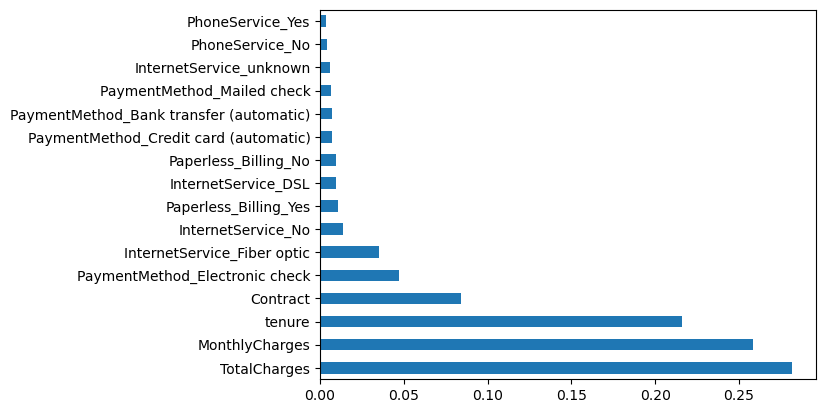

In [37]:
model = ExtraTreesClassifier()
model.fit(X,y)

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(23).plot(kind = 'barh')
plt.show()

- Train Test Split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 42)